 # Función de correlación para distribuciones de puntos aleatorios en un anillo

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

### Estimadores de la función de correlación

Estimador de Peebles-Hauser 

$\xi_{PH}^2 = \frac{DD(r)}{RR(r)} - 1$

Estimador de Davis-Peebles 

$\xi_{PH}^2 = \frac{DD(r)}{DR(r)} - 1$

Estimador de Correlacion Hamilton 

$\xi_{H}^{2} = \frac{DD(r)RR(r)}{(DR(r))^{2}}$

Estimador de Correlación Landy-Szalay 

$\xi_{LZ}^2 = \frac{DD(r)-2DR(r)+RR(r)}{RR(r)}  $

In [15]:
# Estimadores 

def peebles(DD,RR):
    return (DD/RR)-1

def davis(DD,DR):
    return (DD/DR)-1

def hamilton(DD,RR,DR):
    return (DD*RR)/(DR)**2

def landy(DD,RR,DR):
    return (DD+RR-2*DR)/RR



In [21]:
# Función con lo que se obtiene una distribución uniforme de un anillo

# Input values: r es el radio mayor, r1 el radio menor, N numero de puntos
def anillo(r,r1,N):
    anillo = []
    i=0
    # Ciclo que obtiene N puntos dentro de un circulo o esfera
    while i<N:
        point = np.random.random(dim)*2*r-r # Se crea el punto
        r_test = (point**2).sum(axis=0)**.5 
        # Se guarda el punto si el punto esta dentro de el circulo
        if (r_test <= r and r_test >= r1 ):
            anillo.append(point)
            i+=1
    anillo = np.array(anillo)
    anillo = anillo.T
    return anillo # Regresa los punos dentro del circulo

In [22]:
# Función con lo que se obtiene la distancia entre los puntos de la distribución

# Input values: D son los datos, R datos random, bins los intervalos, tipo es DD,RR,DR
def distancia(D,R,bins,tipo):
    
    if (tipo == 'DD' or tipo == 'RR'):
        # Form the periodic distance array
        dist = D[:,None] - D[...,None] # resta todas las combinaciones y los almacena en dos matrices una para cada renglon
        dist = (dist**2).sum(axis=0)**.5 # axis=0, asegura que use los datos de cada renglon, y no las columnas. Devuelve una matriz triangular
        dist = dist[np.triu_indices(N, k = 1)] # extrae el tringulo superior (puede ser el inferior pq es simetrica), hay q especificar el número N
    
    if tipo == 'DR':
        dist = D[:,None] - R[...,None]
        dist = (dist**2).sum(axis=0)**.5
        dist = dist.flatten() # Regresa las frecuencias en un arreglo de 1 dimensión
        
    #Histograma
    
    count, bins, ignored_D = plt.hist(dist,bins = bins,color='purple',edgecolor = 'black',  linewidth=1)
    plt.title('Histograma de distancias datos %s'%tipo)
    plt.legend()
    plt.show()
    return dist, count # Regresa laS distancias, y las frecuencias del histograma

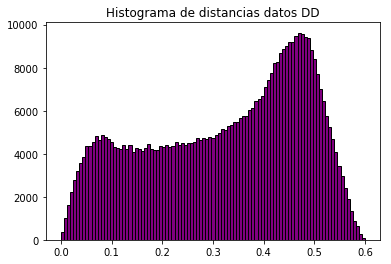

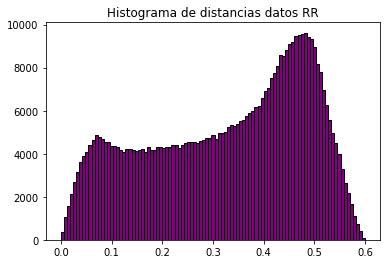

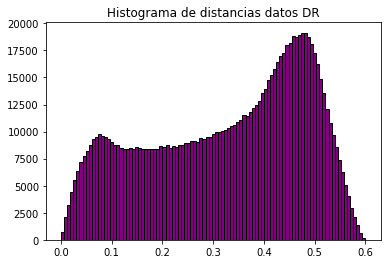

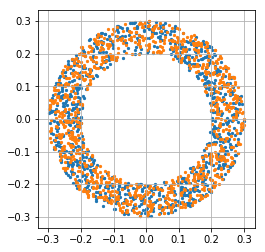

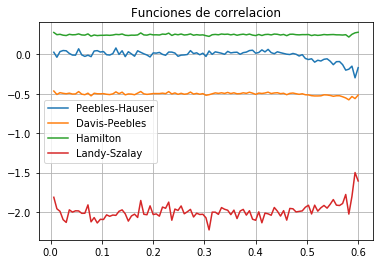

In [24]:
# Obtener los puntos dentro del anillo
r,r1,N = .3,.2,1000
bins = np.linspace(0,2*r,100)

# Datos
D = anillo(r,r1,N) 
dist_DD,DD = distancia(D,None,bins,'DD')
x_D,y_D = D # obtenemos valores de x y y de D

# Random 
R = anillo(r,r1,N)  
dist_RR,RR = distancia(R,None,bins,'RR')
x_R,y_R = R 

# DD-RR
dist_DDRR,DDRR = distancia(D,R,bins,'DR')

plt.clf()
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_D,y_D,s=5)
ax.scatter(x_R,y_R,s=5)
ax.grid()
plt.show()

# Comparando las tres funciones de correlacion
PH = peebles(DD,RR)
D = davis(DD,DDRR)
H = hamilton(DD,RR,DDRR)
LS = landy(DD,RR,DDRR)
plt.clf()
plt.plot(bins[1:],PH,label= 'Peebles-Hauser')
plt.plot(bins[1:],D,label= 'Davis-Peebles')
plt.plot(bins[1:],H,label= 'Hamilton')
plt.plot(bins[1:],LS,label= 'Landy-Szalay')
plt.title('Funciones de correlacion')
plt.grid()
plt.legend()
plt.show()
